# Rotation of Images

#### Importing Libraries

In [1]:
#%matplotlib inline
import numpy as np 
#from matplotlib import pyplot as plt 
import cv2
import imageio
import SimpleITK
import sys
from pylab import *


#### Reading the image 

In [2]:
cells = cv2.imread("cells_scale.png",0)
lena = cv2.imread("lena_translate.png",0)
pisa = cv2.imread("pisa_rotate.png",0)


#### Defining Interpolation (Bilinear)
This function Computes the intensity at source point by bilinearly interpolating
intensities in the immediate 2 X 2 neighborhood of the source point(si,sj).

In [3]:
def bilinear_interpolation(src,si,sj):
    #si , sj = src_pt
    #si= ti-ty
    #sj= tj-tx
    i=int(np.floor(si)) #+cx   
    j=int(np.floor(sj)) #+cy     ## Here i,j are the co-ordinate points of the top left (t_l)
    t_l = i , j 
    
    ##Now the remaining three co-ordinates with respect to i,j will be 
    t_r = i ,j+1    # Top right
    b_l = i+1 , j   # Bottom Left 
    b_r = i+1 , j+1 # Bottom Right 
    
    ##Distance from pixel
    di = si  + cx - i
    dj = sj  + cy - j 
    
    ## Now calculating the pixel value at the source point by using bilinear interpolation technique
    if t_l[0] >= np.shape(src)[0]-1 or t_l[1] >=np.shape(src)[1]-1 or t_l[0]<=0 or t_l[1]<= 0 :
        pxl_val = 0
    else :
        pxl_val = (1-di)*(1-di)*src[t_l] + (1-di)*(dj)*src[t_r] + (di)*(1-dj)*src[b_l]+ (di)*(dj)*src[b_r]
    
    #return np.unit8(pxl_val)
    return pxl_val


#### Doing transformation 

In [4]:
#Initialising the target image 
trg = np.zeros(np.shape(pisa))

#Getting the co-ordinates of the centre of source image because the rotation will be done about the centre.
cx = int(np.floor(np.shape(pisa)[0]/2))
cy = int(np.floor(np.shape(pisa)[1]/2))

#Defining the transform for rotation
def transform(src):
    r , c = np.shape(src)
    
    ## iterate over the target image and assign all the pixel values to them
    for ti in range(r):
        for tj in range(c):
            #si= ti-ty
            """
            1. First we will trnaslate to the centre as we have to do the rotation about the centre 
            2. Then we will apply rotation as we would apply rotation around the origin
            3. And then we will trnaslate back 
            All these steps can be done by the following transform
            """
            si = np.cos(theta)*(ti-cx) - np.sin(theta)*(tj-cy) +cx
            sj = np.sin(theta)*(ti-cx) + np.cos(theta)*(tj-cy) +cy
            #si,sj=np.array([ti,tj,1])
            #si,sj=si/z,sj/z
            
            ## Assigniing the intensity values of  the target image at (ti,tj) using the bilinear interpolation above.
            #sj= tj-tx
            #if (0<= si < r-1  & 0<= sj < c-1):
            trg[ti][tj]=bilinear_interpolation(src,si,sj)
            #else:
                #trg[ti][tj]=0
    return trg


#### Rotation Parameter 
By taking theta approximately -4 degree (rotating clockwise) we get the straight tower of pisa.

In [5]:
# convert to radians as NumPy uses radians
theta = -4*pi/180

#### Defining Rotate 

In [6]:
def rotate(src):
    
    
    return transform(src)

#### Calling rotate function 

In [7]:
pisa_rotated=rotate(pisa)

#### Original Image 

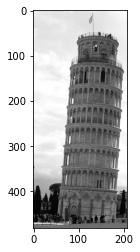

In [8]:
plt.imshow(pisa,cmap='gray')
plt.show()

#### Rotated Image 

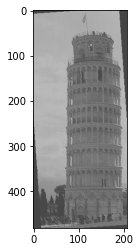

In [9]:
plt.imshow(pisa_rotated,cmap = 'gray')
plt.show()

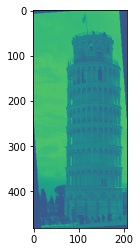

In [10]:
plt.imshow(pisa_rotated)
plt.show()